___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [3]:
# import sys
# sys.executable


In [4]:
# !pip install xgboost


In [5]:
import xgboost


In [6]:
from xgboost import XGBClassifier


In [7]:
xgboost.__version__

'2.0.0'

In [8]:
import sklearn

sklearn.__version__

'1.3.1'

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [9]:
dffemale = pd.read_csv('ANSUR II FEMALE Public.csv')

In [10]:
dfmale = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin-1')

## Explore Data

In [11]:
print(dfmale.shape)
print(dffemale.shape)

(4082, 108)
(1986, 108)


In [12]:
dffemale.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [13]:
dfmale.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [14]:
dffemale.rename(columns={'SubjectId': 'subjectid'}, inplace=True) 
#We should rename this column before concatenating the two datasets; otherwise, it will result in two separate columns with numerous NaN values.

In [15]:
dffemale.head() #checking

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [16]:
# Concatenate the 'dfmale' and 'dffemale' DataFrames along the rows (axis=0) and reset the index.
df = pd.concat([dfmale, dffemale], axis=0, ignore_index=True)


df.head() #checking


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [17]:
df.shape #checking rows no.

(6068, 108)

In [18]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [19]:
df.isnull().sum().any()

True

In [20]:
df.duplicated().sum() 

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


Text(0, 0.5, '')

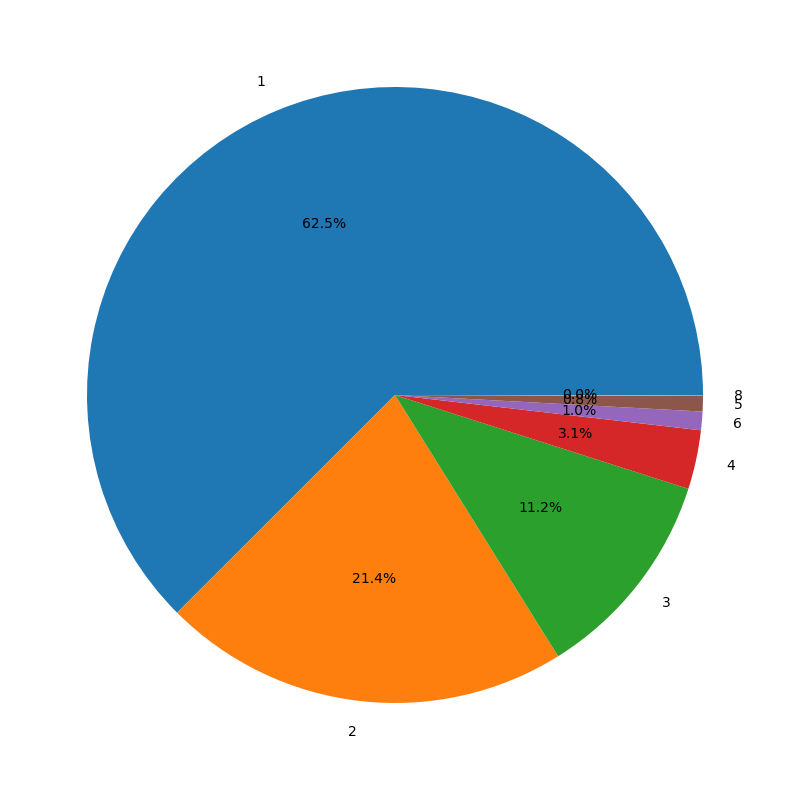

In [21]:
print(df['DODRace'].value_counts())
df['DODRace'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.ylabel('')

In [22]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [23]:
# Drop the 'Ethnicity' column due to the presence of 4647 NaN values.
df = df.drop('Ethnicity', axis=1)


In [24]:
df.shape 
#checking after the dropping

(6068, 107)

In [25]:
df.isnull().sum().any() #checking after the dropping

False

In [26]:
#unique value 
for col in df.select_dtypes("object"):
    print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [27]:
df.SubjectsBirthLocation.value_counts()

California                  446
New York                    420
Texas                       397
Indiana                     266
Oklahoma                    221
Illinois                    216
Florida                     210
Minnesota                   200
Michigan                    196
Mississippi                 194
Georgia                     170
Alabama                     164
South Carolina              161
North Carolina              149
Ohio                        142
Louisiana                   137
Pennsylvania                132
Virginia                    118
Massachusetts               112
Wisconsin                   102
Germany                      92
New Jersey                   89
Puerto Rico                  88
Arizona                      84
Missouri                     84
Colorado                     81
Maryland                     80
Tennessee                    74
Kentucky                     69
Washington                   66
Kansas                       63
South Da

In [28]:
np.mean(df.SubjectsBirthLocation.value_counts())

39.921052631578945

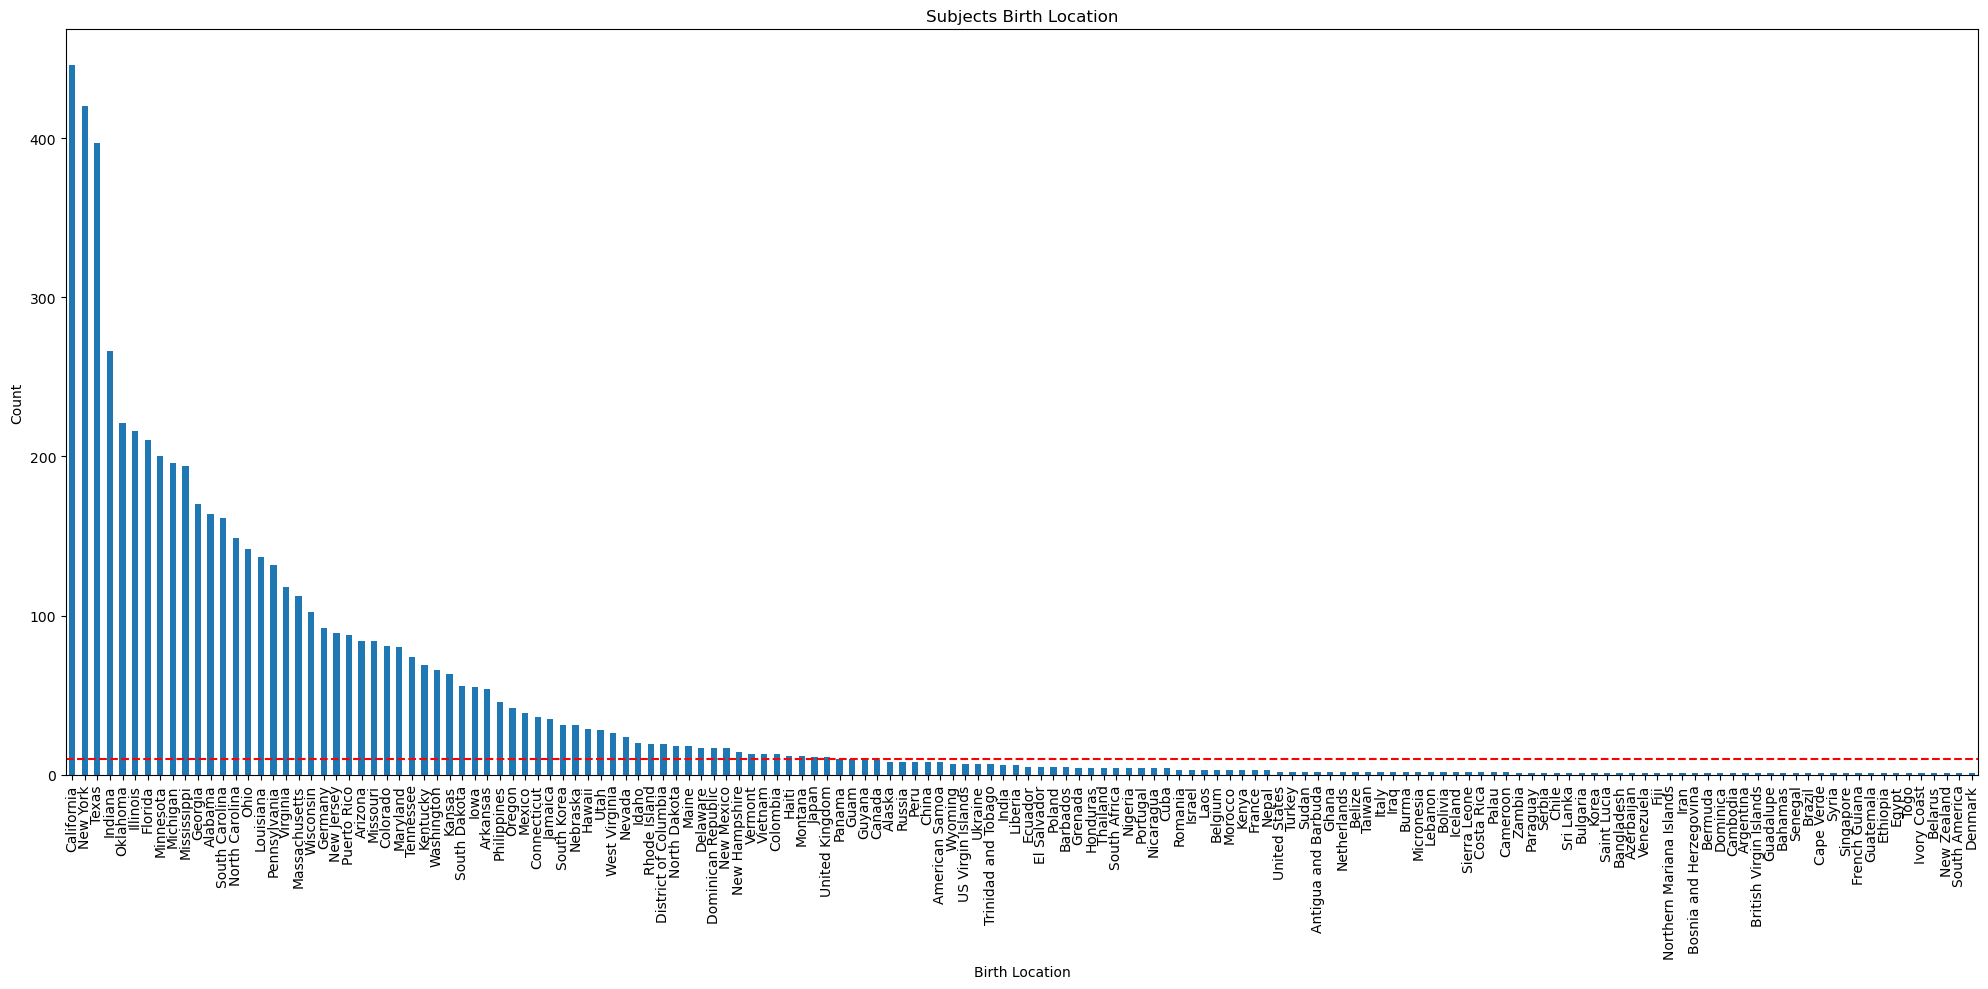

In [29]:
df.SubjectsBirthLocation.value_counts().plot(kind="bar", figsize=(20,10))
plt.title("Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")
plt.axhline(10, color='r', linestyle='--')  #threshold=10
plt.tight_layout();

In [30]:
#Making a dictionary of states and their regions.
states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [31]:
# Making a dictionary of the countries and their continents.
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}


In [32]:
df['SubjectsBirthLocation'].values

array(['North Dakota', 'New York', 'New York', ..., 'Texas', 'Texas',
       'Texas'], dtype=object)

In [33]:
df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in df["SubjectsBirthLocation"].values ]
df["SubjectsBirthLocation"].value_counts()

California              446
New York                420
Texas                   397
Indiana                 266
North America           265
Oklahoma                221
Illinois                216
Florida                 210
Minnesota               200
Michigan                196
Mississippi             194
Georgia                 170
Alabama                 164
South Carolina          161
North Carolina          149
Europe                  149
Asia                    144
Ohio                    142
Louisiana               137
Pennsylvania            132
Virginia                118
Massachusetts           112
Wisconsin               102
New Jersey               89
Missouri                 84
Arizona                  84
Colorado                 81
Maryland                 80
Tennessee                74
Kentucky                 69
Washington               66
Kansas                   63
South Dakota             56
Iowa                     55
Arkansas                 54
South America       

In [34]:
df.head() #checking

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,

In [35]:
df.shape

(6068, 107)

In [36]:
df['SubjectsBirthLocation'].nunique()

57

In [37]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [38]:
# Map numeric codes to descriptive race categories in the 'DODRace' column.
df["DODRace"] = df.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)


In [39]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

<Axes: ylabel='Component,DODRace'>

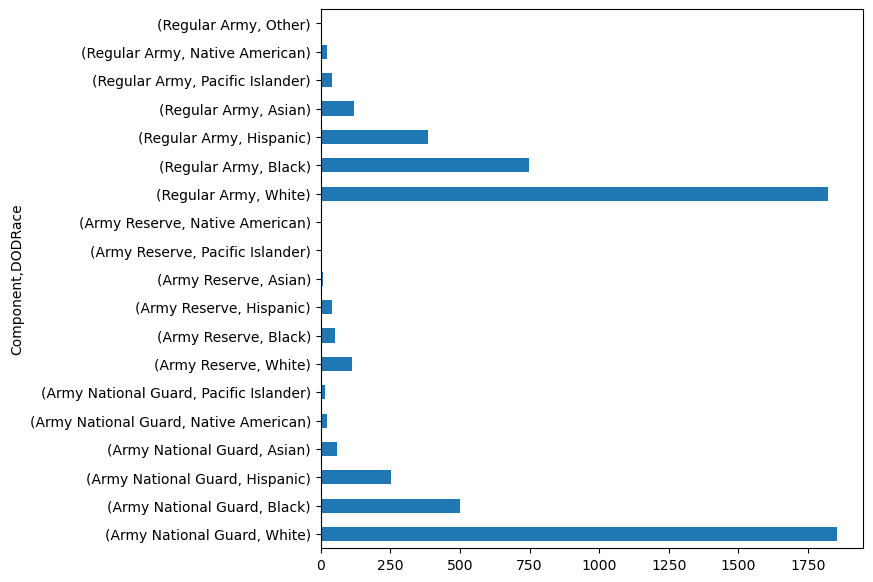

In [40]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(7, 7))

In [41]:
# Create a cross-tabulation table to show the distribution of races by 'Component' with row and column percentages.
ct = pd.crosstab( df.DODRace, [df.Component, df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component        Army National Guard                                       Army Reserve                                       Regular Army                                           Total
Branch                   Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support          
DODRace                                                                                                                                                                                   
Asian                       0.022305               0.023158       0.018908     0.000000               0.047945       0.029412     0.033810               0.036806       0.044271  0.030982
Black                       0.097893               0.218947       0.226891     0.000000               0.164384       0.411765     0.122237               0.255147       0.317708  0.213909
Hispanic                    0.091698               0.099649       0.077731     0.166667               0.205479       0.147059     0.148244               0.120399       0.101562  0.111898
Native American             0.011152               0.007018       0.010504     0.000000               0.006849       0.000000     0.009103               0.008734       0.003906  0.008075
Other                       0.000000               0.000000       0.000000     0.000000               0.000000       0.000000     0.001300               0.001248       0.000000  0.000494
Pacific Islander            0.004957               0.007719       0.004202     0.000000               0.013699       0.014706     0.011704               0.008734       0.020833  0.009723
White                       0.771995               0.643509       0.661765     0.833333               0.561644       0.397059     0.673602               0.568933       0.511719  0.624918

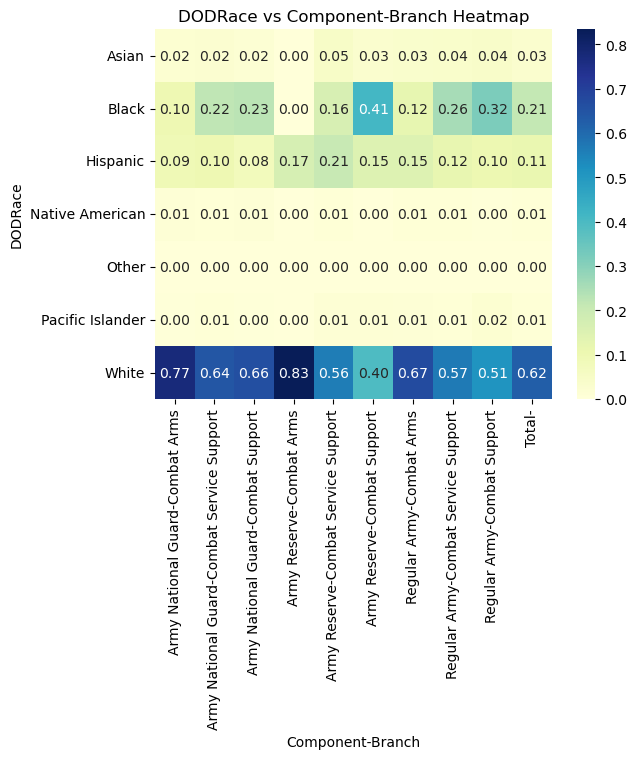

In [42]:
#Create a heatmap visualization of the cross-tabulation table
sns.heatmap(ct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
# Set the title for the heatmap.
plt.title('DODRace vs Component-Branch Heatmap')
plt.show()# Display the heatmap.


In [43]:
df.SubjectNumericRace.value_counts()


1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [44]:
# Remove the specified columns from the DataFrame 'df' to create a more focused dataset.
drop_list = [
    "Date",
    "Installation",
    "Component",
    "Branch",
    "PrimaryMOS",
    "Weightlbs",
    "Heightin",
    "subjectid",
    "SubjectNumericRace",
]

df.drop(columns=drop_list, inplace=True)

In [45]:
df.shape #checking if dropping was successful 

(6068, 98)

In [46]:
df.DODRace.value_counts() #unbalanced data

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [47]:
df2 = df[df["DODRace"].isin(["White", "Black", "Hispanic"])]
df2

#create a new DataFrame by filtering the original DataFrame to include only rows where the 'DODRace' column matches specific race categories and then displays the resulting DataFrame.

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [48]:
df2.reset_index(drop=True, inplace=True)
df2

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [49]:
def format_row_based_on_comparison(row):
    # Compare the second column with the first column
    if row.iloc[2] >= row.iloc[1]:
        return ['color: red'] * len(row)
    elif row.iloc[7] > (row.iloc[6] + (row.iloc[6] - row.iloc[4]) * 1.5) or row.iloc[3] < (row.iloc[4] - (row.iloc[6] - row.iloc[4]) * 1.5):
        return ['color: orange'] * len(row)
    else:
        return [''] * len(row)
    
# Define a function to format a row based on comparisons between specific elements within that row.
# If the second column is greater than or equal to the first column, the row is colored red.
# If certain conditions involving elements in columns 1, 3, 4, 6, and 7 are met, the row is colored orange.
# Otherwise, the row is left with the default formatting (no specific color).

In [50]:
# Create a styled DataFrame summary for 'df2.describe()' and apply custom row formatting using the 'format_row_based_on_comparison' function.
styled_df = df2.describe().T.style.apply(format_row_based_on_comparison, axis=1)

# Display the styled DataFrame.
styled_df


,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000000,247.254290,37.457748,155.000000,220.000000,243.000000,272.000000,451.000000
acromialheight,5769.000000,1408.630265,78.303123,1146.000000,1353.000000,1412.000000,1464.000000,1683.000000
acromionradialelength,5769.000000,328.071590,20.444554,249.000000,314.000000,328.000000,342.000000,393.000000
anklecircumference,5769.000000,225.201768,15.965783,156.000000,214.000000,225.000000,235.000000,293.000000
axillaheight,5769.000000,1301.902583,71.260913,1062.000000,1252.000000,1304.000000,1351.000000,1553.000000
balloffootcircumference,5769.000000,244.408043,16.803556,186.000000,233.000000,245.000000,256.000000,306.000000
balloffootlength,5769.000000,195.118911,13.379000,151.000000,186.000000,196.000000,205.000000,245.000000
biacromialbreadth,5769.000000,399.706015,30.124094,283.000000,377.000000,404.000000,422.000000,489.000000
bicepscircumferenceflexed,5769.000000,341.663027,41.270615,216.000000,312.000000,342.000000,370.000000,490.000000
bicristalbreadth,5769.000000,274.903449,19.239580,197.000000,262.000000,274.000000,288.000000,362.000000


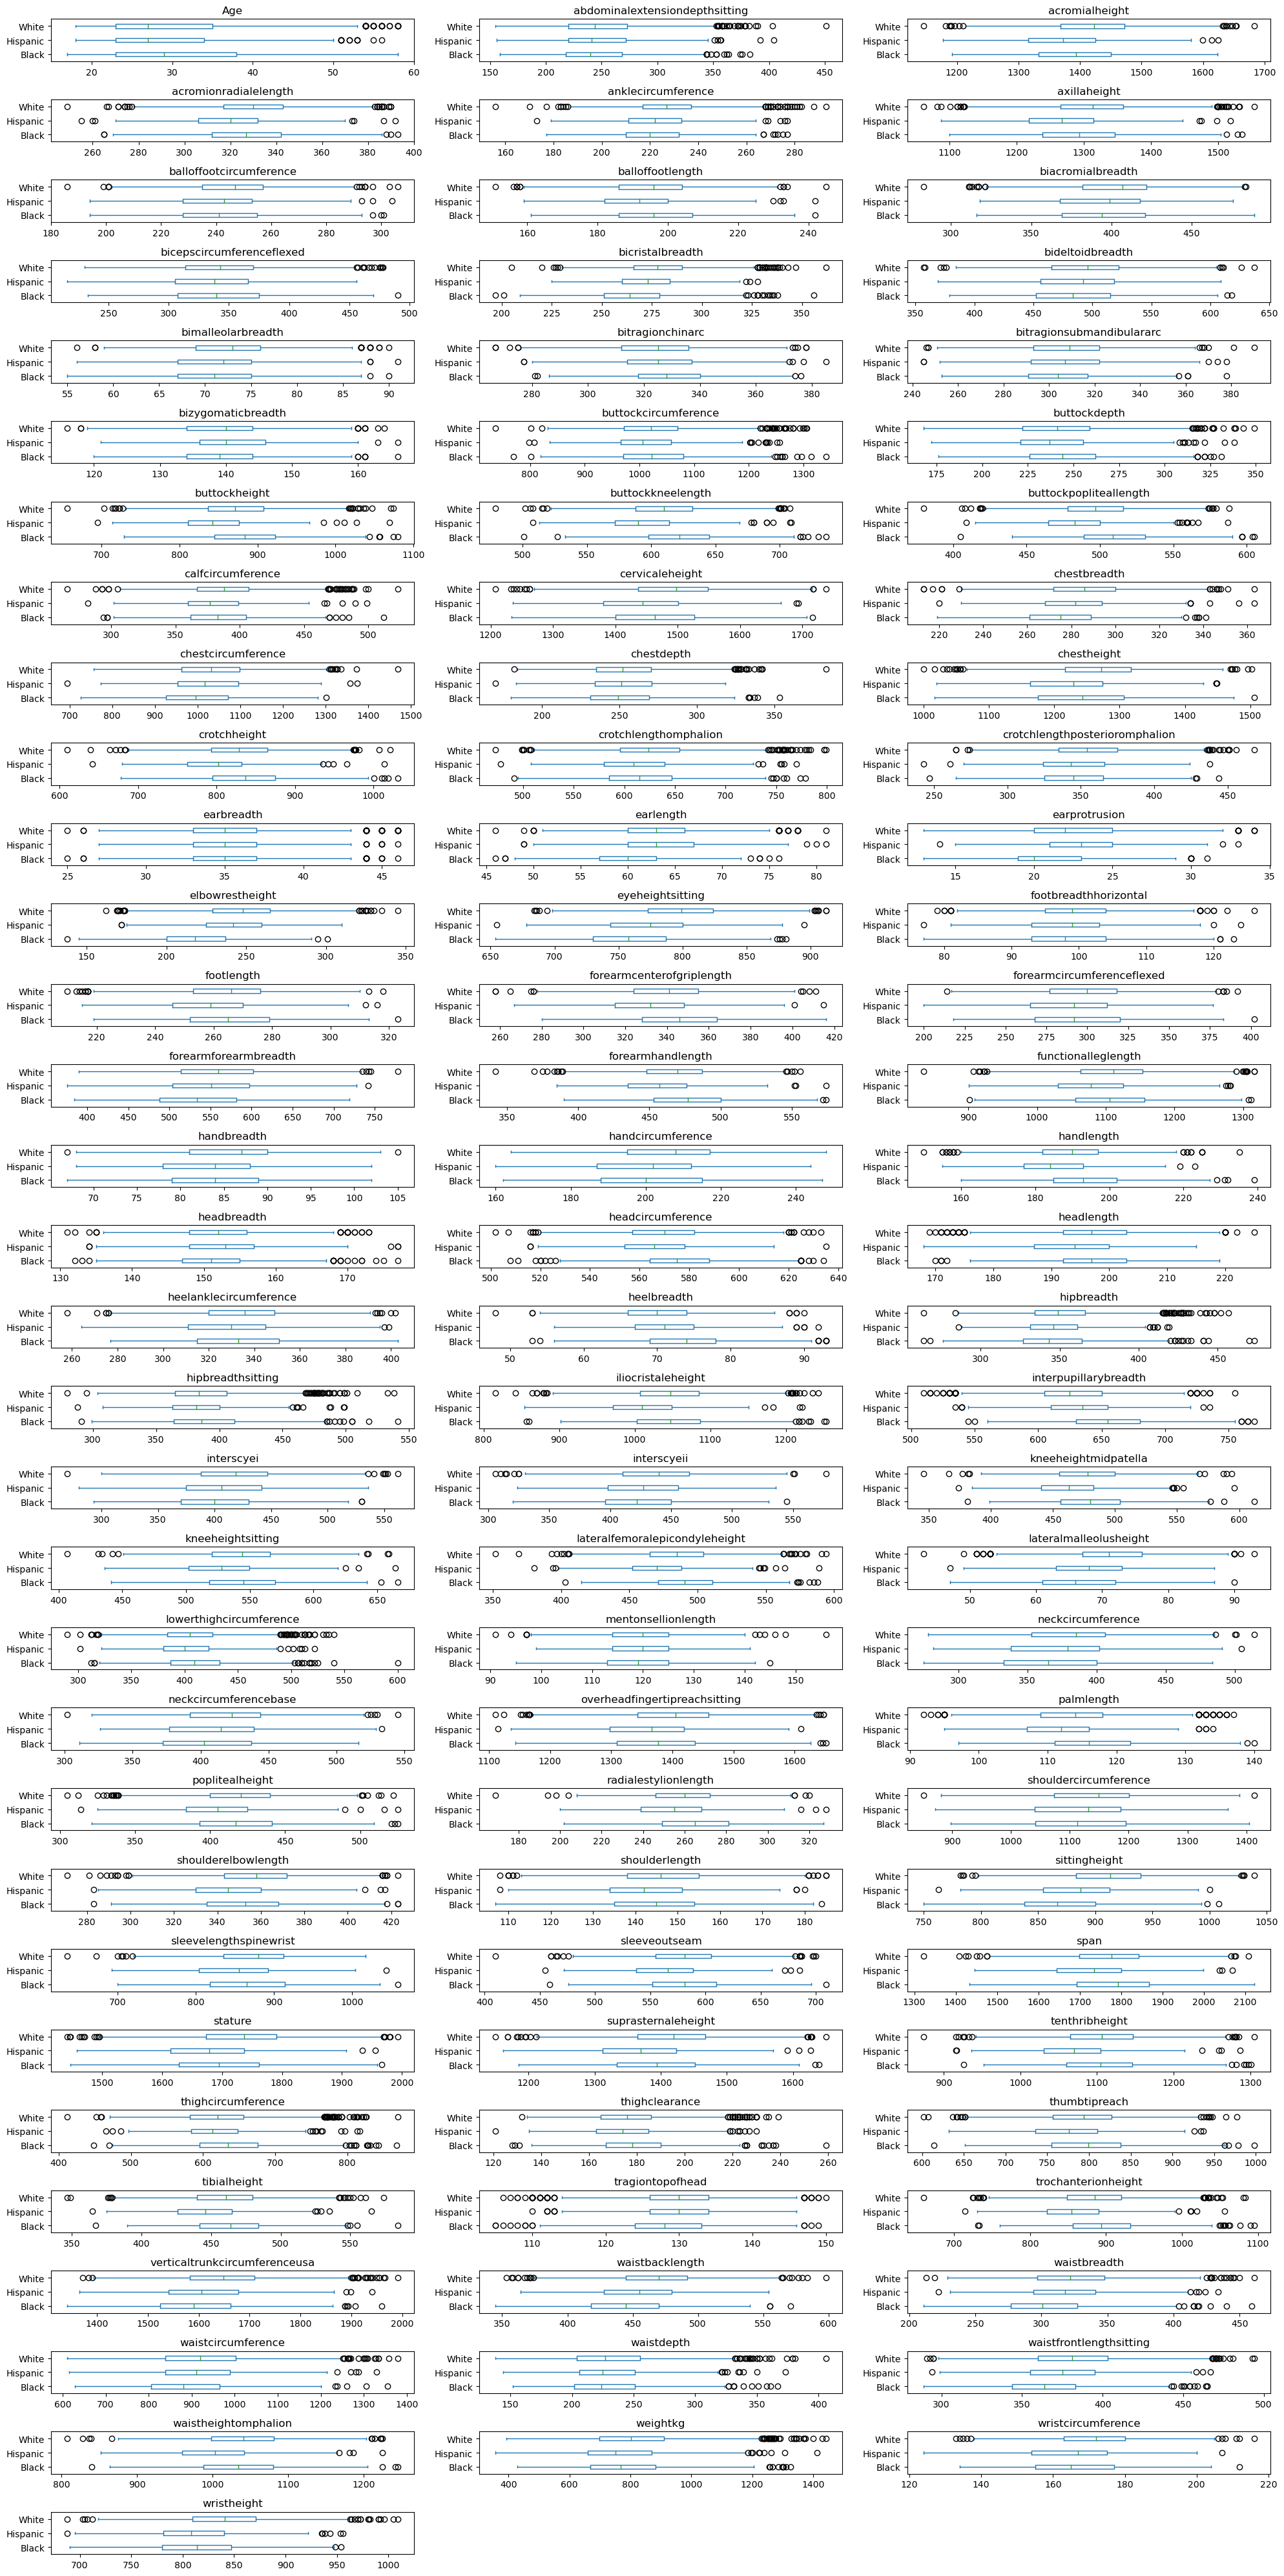

In [51]:
# Create a box plot for the 'df2' DataFrame, grouping data by 'DODRace' (race categories).
# The subplots are organized in a 32x3 grid layout with specified figsize and layout parameters.
# The boxes are displayed horizontally (vert=False), and x and y axes are not shared between subplots.
df2.plot(by='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)

# Ensure proper layout of subplots.
plt.tight_layout()

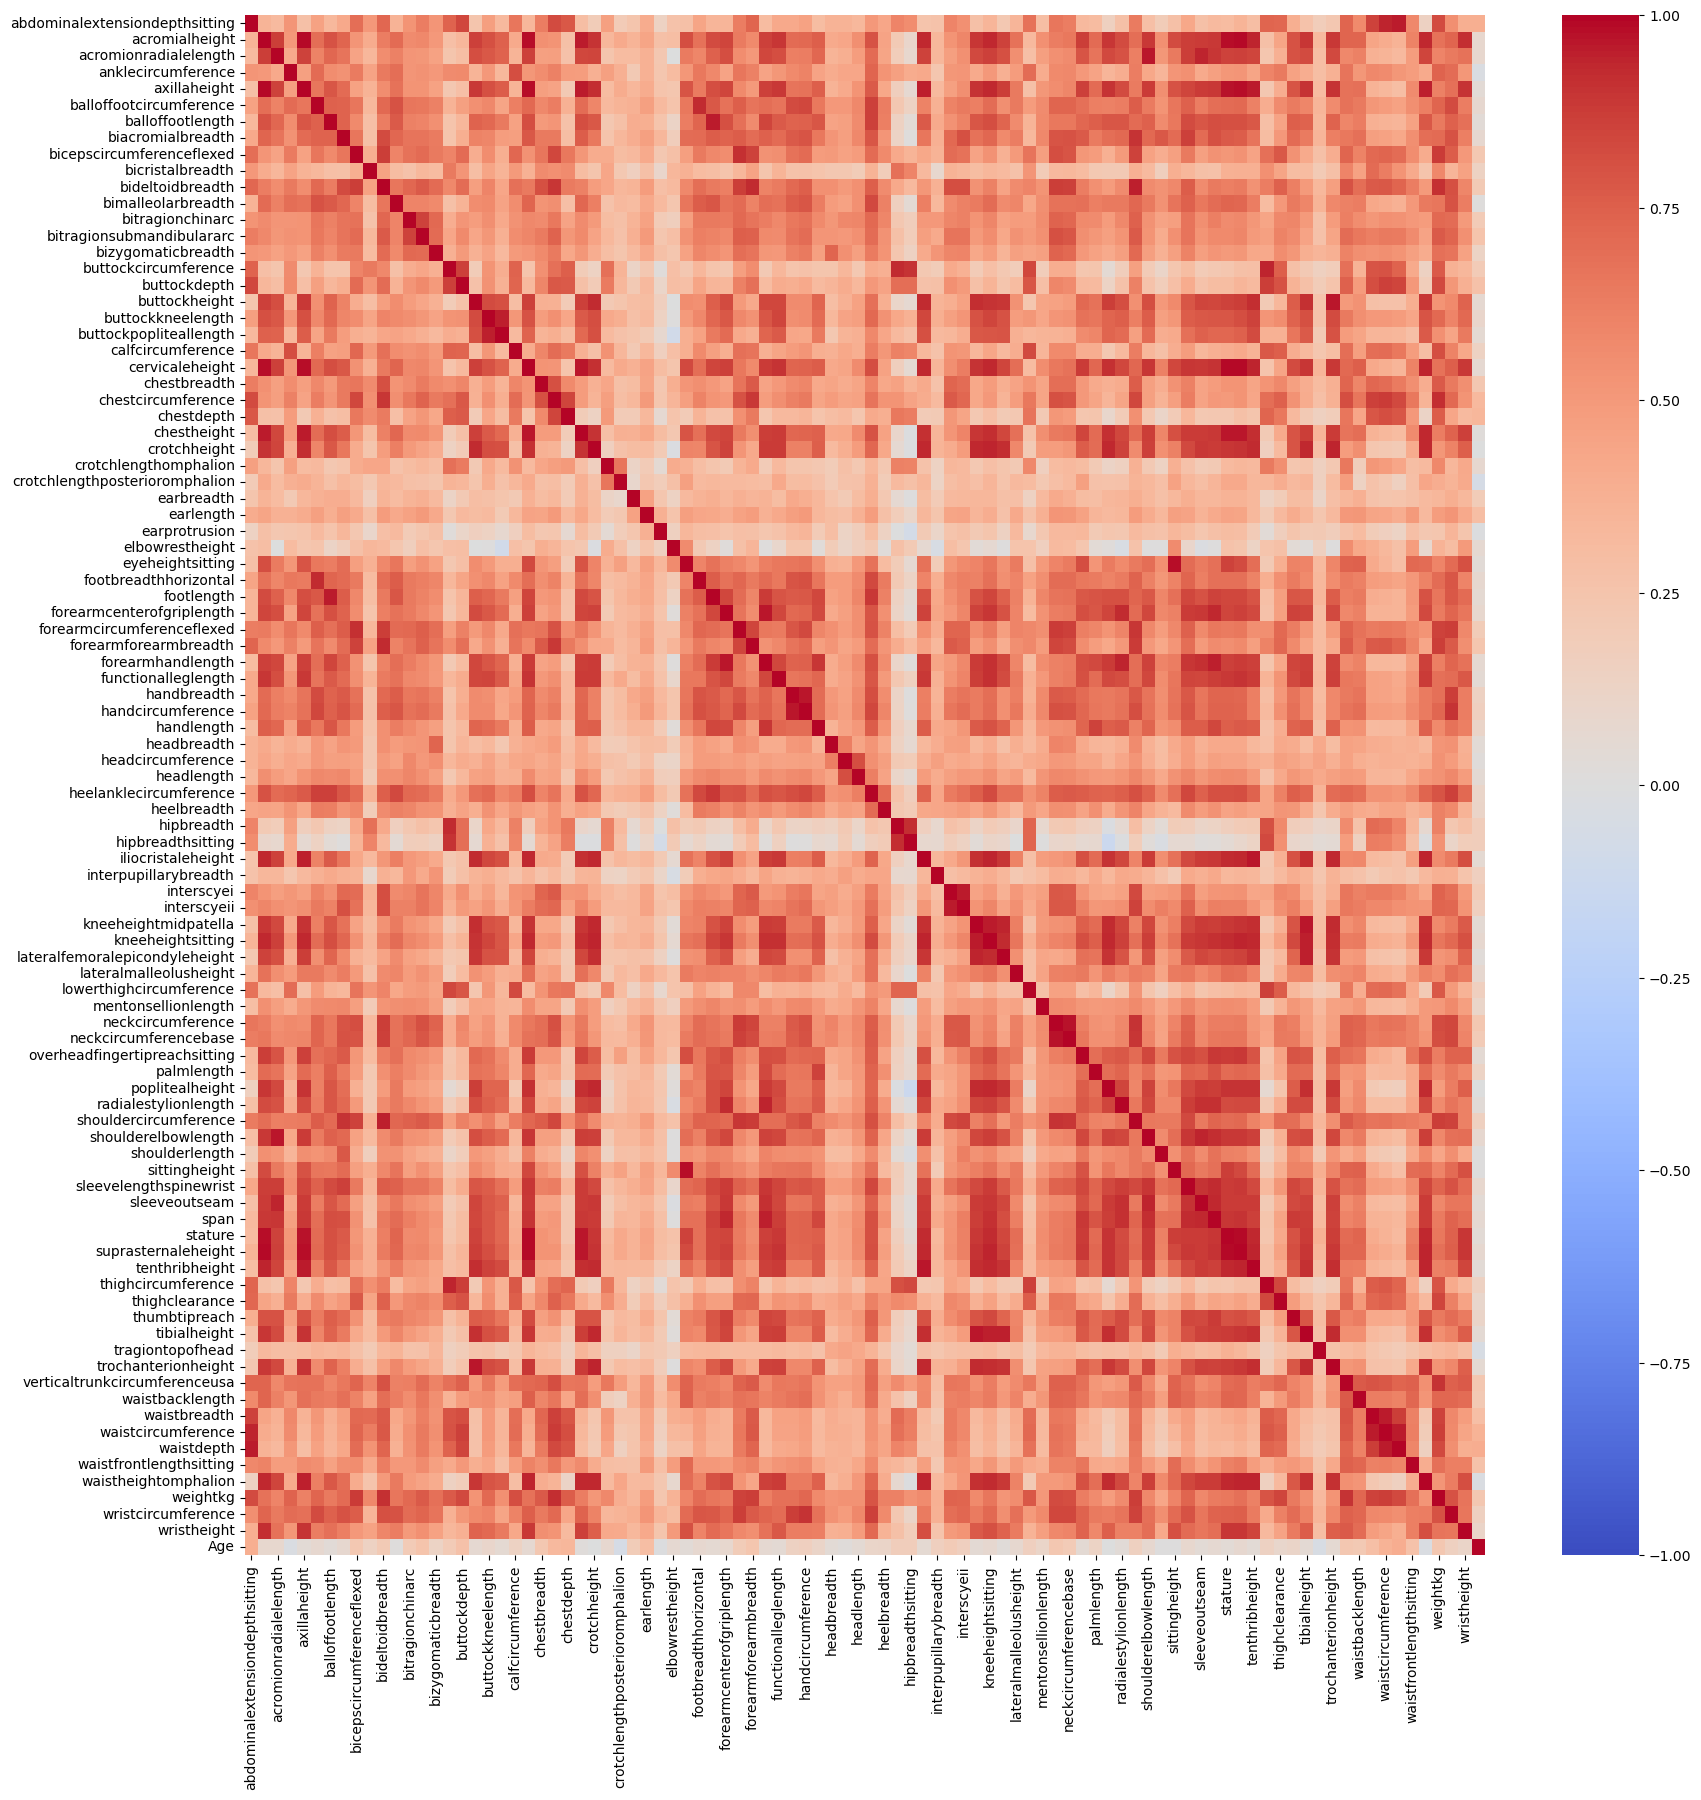

In [52]:
# Create a correlation heatmap for the numeric columns in the 'df2' DataFrame.
plt.figure(figsize=(20, 20))
sns.heatmap(df2.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm");
# has a multicollinearity issue, but it's fine for logregg with regularisation and non-parametric algorithms.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [53]:
X=df2.drop(columns=['DODRace'])
y=df2.DODRace

In [54]:
X.shape

(5769, 97)

In [55]:
# Split the dataset into training and testing sets.
# X_train and y_train represent the training data and labels, while X_test and y_test represent the testing data and labels.
# The 'stratify' parameter ensures that the class distribution in 'y' is preserved in the split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y #keep the ratio of y in the splited data as the original data
)

In [56]:
X.sample(20)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
2847,305,1482,329,244,1355,265,193,450,384,316,589,76,334,322,145,1118,279,874,648,535,406,1552,326,1206,272,1342,858,738,412,33,62,29,268,807,107,263,344,322,650,480,1151,87,212,188,159,583,201,355,72,373,415,1054,620,481,496,493,562,496,83,427,129,407,452,1405,115,441,272,1306,357,166,926,930,600,1798,1789,1467,1092,692,200,804,468,133,895,1812,481,381,1071,274,347,1093,1049,179,894,Male,Nebraska,21,Right hand
4876,206,1244,294,223,1147,221,175,331,273,253,421,64,299,283,135,1002,226,783,576,485,358,1303,243,845,207,1101,736,588,309,29,54,20,197,682,95,237,295,238,453,415,978,76,176,171,146,540,177,295,67,348,392,929,655,334,367,415,482,449,58,405,104,304,361,1162,103,369,232,940,317,116,782,739,518,1551,1517,1239,983,601,162,683,411,126,804,1414,384,278,782,169,312,920,548,145,738,Female,Illinois,28,Right hand
3888,232,1272,296,217,1166,223,170,366,313,252,441,70,307,293,141,922,221,763,553,460,364,1345,254,907,216,1141,738,586,299,38,60,28,223,737,90,226,298,284,467,409,969,80,192,164,149,536,182,294,68,311,340,920,600,397,404,400,465,421,61,355,112,380,409,1251,99,369,234,1055,325,131,851,787,524,1551,1567,1268,1000,558,166,701,378,120,754,1503,440,291,826,209,340,920,620,162,751,Male,New York,24,Right hand
3290,251,1439,324,235,1356,252,207,433,373,248,524,78,350,322,154,1053,260,949,654,543,389,1531,275,1004,243,1304,881,636,364,41,63,18,215,784,103,276,351,322,608,496,1121,90,218,198,163,595,206,355,82,329,378,1061,700,440,475,507,560,506,68,416,129,400,430,1362,121,442,278,1220,352,161,894,910,595,1821,1775,1457,1158,655,190,794,479,133,953,1639,454,306,896,230,349,1105,876,173,851,Male,South America,26,Right hand
1694,278,1530,351,242,1402,264,202,411,364,273,520,76,343,327,148,1057,252,908,643,524,386,1591,292,1142,275,1375,881,653,386,38,76,24,279,853,104,282,355,317,628,485,1199,84,205,200,156,603,212,356,71,354,399,1127,665,405,438,505,584,515,81,425,123,421,450,1537,119,450,271,1216,382,147,970,927,614,1854,1842,1529,1178,662,188,809,491,136,934,1781,484,340,1031,274,446,1114,981,181,925,Male,Arkansas,35,Right hand
4192,245,1326,304,233,1228,228,177,394,270,266,453,69,294,265,136,1022,239,802,577,464,378,1379,265,999,265,1151,758,624,334,35,64,23,230,751,93,243,313,246,475,431,1047,72,177,183,157,555,183,313,62,348,396,996,620,351,378,434,500

In [57]:
y.sample(20)

5122       White
824     Hispanic
1855       White
4156       White
4884       Black
726        White
3524       White
4714       White
5090       White
771        Black
1202       Black
5671       White
680        White
1975       White
4374    Hispanic
2428       Black
4079       White
2639       White
5288       Black
2197       White
Name: DODRace, dtype: object

In [58]:
X_train.shape

(4615, 97)

In [59]:
y_train.shape

(4615,)

In [60]:
X_test.shape

(1154, 97)

In [61]:
y_test.shape

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    # Predict on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate and display results for the testing set
    print("Evaluation on the Test Set:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

    # Evaluate and display results for the training set
    print("Evaluation on the Training Set:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification Report:")
    print(classification_report(y_train, y_train_pred))


In [63]:
cat = X_train.select_dtypes('object').columns
cat # needed to change to numbers

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [64]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [65]:
from sklearn.pipeline import Pipeline 

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [66]:
pipe_log_model.fit(X_train, y_train)
evaluate_classification_model(pipe_log_model, X_train, y_train, X_test, y_test)

Evaluation on the Test Set:
Confusion Matrix:
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 948   56   34]
 [  27  445   71]
 [  54  360 2620]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      

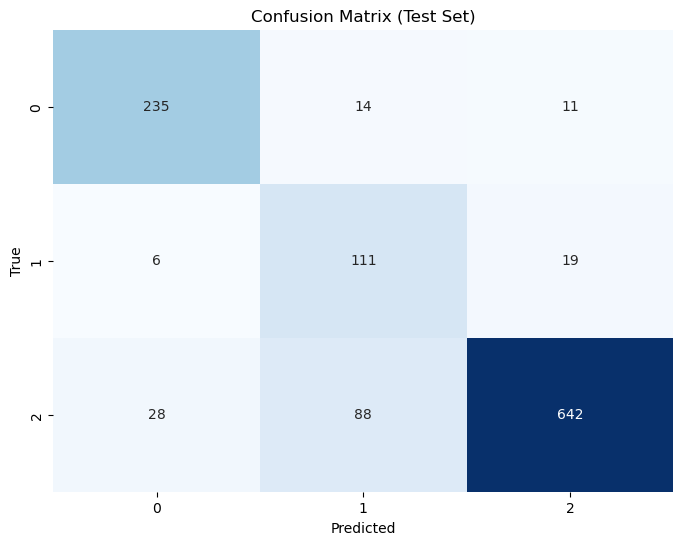

In [67]:
# Extract the confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, pipe_log_model.predict(X_test))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [68]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define custom scoring metrics for the "Hispanic" class:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}


In [69]:
# Define a sequence of operations to be applied in a machine learning pipeline:
operations = [
    ("OneHotEncoder", column_trans),  # Apply one-hot encoding to categorical columns
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),  # Apply logistic regression with balanced class weights
]

# Create a machine learning model pipeline using the defined operations:
model = Pipeline(steps=operations)

# Perform cross-validation with the model, scoring using the custom scoring metrics, and returning train scores:
scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)

# Create a DataFrame to store and analyze the cross-validation results:
df_scores = pd.DataFrame(scores, index=range(1, 11))

# Calculate and display the mean of cross-validation results, starting from the third column (index 2) onward.
df_scores.mean()[2:]


test_precision_Hispanic     0.481198
train_precision_Hispanic    0.521964
test_recall_Hispanic        0.771515
train_recall_Hispanic       0.827909
test_f1_Hispanic            0.592045
train_f1_Hispanic           0.640252
dtype: float64

### Logistic Model GridsearchCV

In [70]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [71]:
# Define a grid of hyperparameters for hyperparameter tuning of the logistic regression model.
param_grid = {
    "log__C": [0.5, 1],  # Regularization parameter values
    "log__penalty": ["l1", "l2"],  # Penalty terms for regularization (L1 or L2)
    "log__solver": ["liblinear", "lbfgs"],  # Solvers for optimization
}


In [72]:
# Define a sequence of operations to be applied in a machine learning pipeline:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]
# Create a machine learning model pipeline using the defined operations:
model = Pipeline(steps=operations)

# Create a GridSearchCV object for hyperparameter tuning of the model:
log_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [73]:
# Fit the hyperparameter-tuned model on the training data.
log_model_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [74]:
# Create a DataFrame from the cross-validation results and select the mean test and train scores for the best model configuration.
result_df = pd.DataFrame(log_model_grid.cv_results_)
best_scores = result_df.loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

best_scores

mean_test_score     0.771515
mean_train_score    0.827909
Name: 7, dtype: object

In [75]:
evaluate_classification_model(log_model_grid, X_train, y_train, X_test, y_test)

Evaluation on the Test Set:
Confusion Matrix:
[[235  14  11]
 [  6 111  19]
 [ 28  88 642]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       260
    Hispanic       0.52      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.86      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 948   56   34]
 [  27  445   71]
 [  54  360 2620]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.52      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.87      0.88      

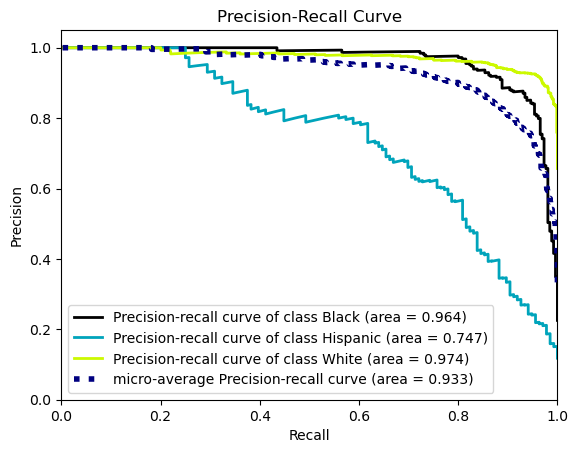

In [76]:
from scikitplot.metrics import plot_roc, plot_precision_recall


operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test) #return the probabilities

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [77]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn.metrics import average_precision_score 

y_test_dummies = pd.get_dummies(y_test).values  #because it is not binary classification 
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.7467312123202616

In [129]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


## 2. SVC

### Vanilla SVC model

In [79]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [80]:
pipe_svc_model.fit(X_train, y_train)

evaluate_classification_model(pipe_svc_model, X_train, y_train, X_test, y_test)

Evaluation on the Test Set:
Confusion Matrix:
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      

In [81]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.456711
train_precision_Hispanic    0.503448
test_recall_Hispanic        0.758552
train_recall_Hispanic       0.834250
test_f1_Hispanic            0.569421
train_f1_Hispanic           0.627923
dtype: float64

###  SVC Model GridsearchCV

In [82]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [83]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [84]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [85]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [86]:
result_df = pd.DataFrame(svm_model_grid.cv_results_)
best_scores = result_df.loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

best_scores

mean_test_score     0.758552
mean_train_score     0.83425
Name: 3, dtype: object

In [87]:
evaluate_classification_model(svm_model_grid, X_train, y_train, X_test, y_test)

Evaluation on the Test Set:
Confusion Matrix:
[[235  13  12]
 [  4 109  23]
 [ 20 100 638]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91       260
    Hispanic       0.49      0.80      0.61       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.85      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 950   52   36]
 [  22  452   69]
 [  55  399 2580]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      

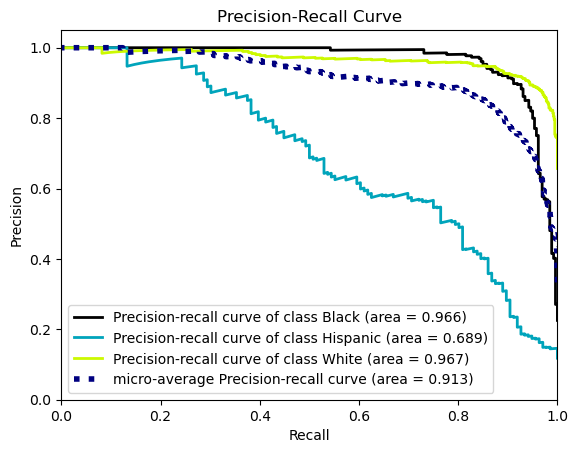

In [88]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show(); #still not much different 

In [89]:
decision_function #probability 

array([[-0.25612844,  1.00325241,  2.25595185],
       [ 0.89195662, -0.2388124 ,  2.25012752],
       [-0.19592464,  1.09009966,  2.17116119],
       ...,
       [ 1.1045256 , -0.20686875,  2.18035493],
       [-0.153075  ,  1.10406805,  2.09443233],
       [-0.26099374,  1.16938286,  2.24008703]])

In [90]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.6891283060889173

In [130]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [91]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [92]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) #if there's a problem with the encoding

column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

### Vanilla RF Model

In [93]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [94]:
evaluate_classification_model(pipe_model_rf, X_train, y_train, X_test, y_test) #as the result shown the accuracy went bad

Evaluation on the Test Set:
Confusion Matrix:
[[195   0  65]
 [  9   4 123]
 [ 14   2 742]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.89      0.75      0.82       260
    Hispanic       0.67      0.03      0.06       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.79      0.59      0.58      1154
weighted avg       0.80      0.82      0.77      1154


Evaluation on the Training Set:
Confusion Matrix:
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
Classification Report:
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      

In [96]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:] #good train bad test, looks like overfitting

test_precision_Hispanic     0.866667
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.027659
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.053387
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [97]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
}

In [98]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [99]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [100]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=101))])

In [101]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [102]:
result_df = pd.DataFrame(rf_grid_model.cv_results_)
best_scores = result_df.loc[rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

best_scores

mean_test_score     0.609582
mean_train_score    0.663906
Name: 2, dtype: object

In [103]:
rf_grid_model.best_score_ #still bad result

0.6095820591233435

In [104]:
evaluate_classification_model(rf_grid_model, X_train, y_train, X_test, y_test)

Evaluation on the Test Set:
Confusion Matrix:
[[197  36  27]
 [ 17  77  42]
 [ 91 230 437]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.65      0.76      0.70       260
    Hispanic       0.22      0.57      0.32       136
       White       0.86      0.58      0.69       758

    accuracy                           0.62      1154
   macro avg       0.58      0.63      0.57      1154
weighted avg       0.74      0.62      0.65      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 797  142   99]
 [  47  355  141]
 [ 241 1035 1758]]
Classification Report:
              precision    recall  f1-score   support

       Black       0.73      0.77      0.75      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.62      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      

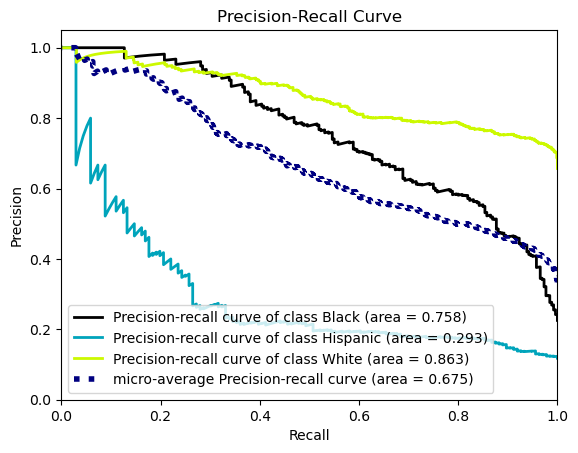

In [105]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=101
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show(); #Even worse!!

In [106]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.2930735411262894

In [131]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [107]:

operations_xgb = [
    ("OrdinalEncoder", column_trans),  # Apply ordinal encoding to categorical columns
    ("XGB_model", XGBClassifier(random_state=101)),  # Use XGBoostClassifier for modeling
]


pipe_model_xgb = Pipeline(steps=operations_xgb)

# Map target labels to numeric values for XGBoost model:
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2}) 
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})  


In [108]:
pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [109]:
evaluate_classification_model(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Evaluation on the Test Set:
Confusion Matrix:
[[227   5  28]
 [ 14  56  66]
 [ 15  11 732]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       260
           1       0.78      0.41      0.54       136
           2       0.89      0.97      0.92       758

    accuracy                           0.88      1154
   macro avg       0.85      0.75      0.78      1154
weighted avg       0.87      0.88      0.87      1154


Evaluation on the Training Set:
Confusion Matrix:
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      

In [110]:

from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb 

)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [111]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

,weights,label
893,2.833026,1
196,0.507031,2
3821,0.507031,2
3206,0.507031,2
4500,1.482017,0


In [112]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [113]:
evaluate_classification_model(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb) #again overfitting

Evaluation on the Test Set:
Confusion Matrix:
[[228   8  24]
 [ 13  65  58]
 [ 19  17 722]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       260
           1       0.72      0.48      0.58       136
           2       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.83      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Evaluation on the Training Set:
Confusion Matrix:
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       543
           2       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      

### XGBoost Model GridsearchCV

In [114]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [115]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [116]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [117]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [118]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 1}

In [119]:
result_df = pd.DataFrame(xgb_grid_model.cv_results_)
best_scores = result_df.loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

best_scores

mean_test_score     0.587547
mean_train_score    0.663447
Name: 15, dtype: object

In [120]:
evaluate_classification_model(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Evaluation on the Test Set:
Confusion Matrix:
[[200  36  24]
 [ 17  75  44]
 [103 156 499]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       260
           1       0.28      0.55      0.37       136
           2       0.88      0.66      0.75       758

    accuracy                           0.67      1154
   macro avg       0.60      0.66      0.61      1154
weighted avg       0.75      0.67      0.69      1154


Evaluation on the Training Set:
Confusion Matrix:
[[ 803  137   98]
 [  55  351  137]
 [ 281  610 2143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1038
           1       0.32      0.65      0.43       543
           2       0.90      0.71      0.79      3034

    accuracy                           0.71      4615
   macro avg       0.64      0.71      0.65      4615
weighted avg       0.79      0.71      0.74      

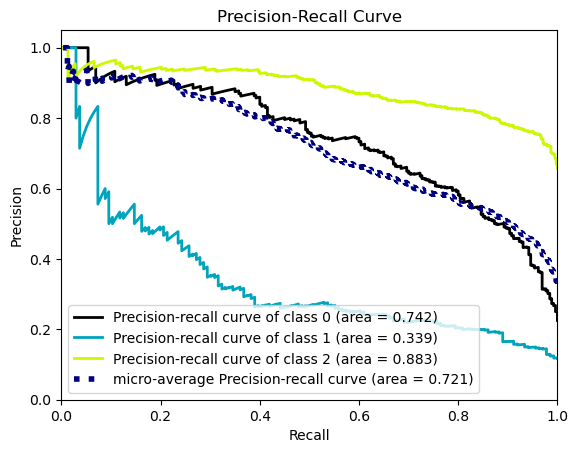

In [121]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=20,
            subsample=0.8,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show() # as it shown it is too bad

In [125]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [126]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.3391947905681958

In [127]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

Comparing Models
---

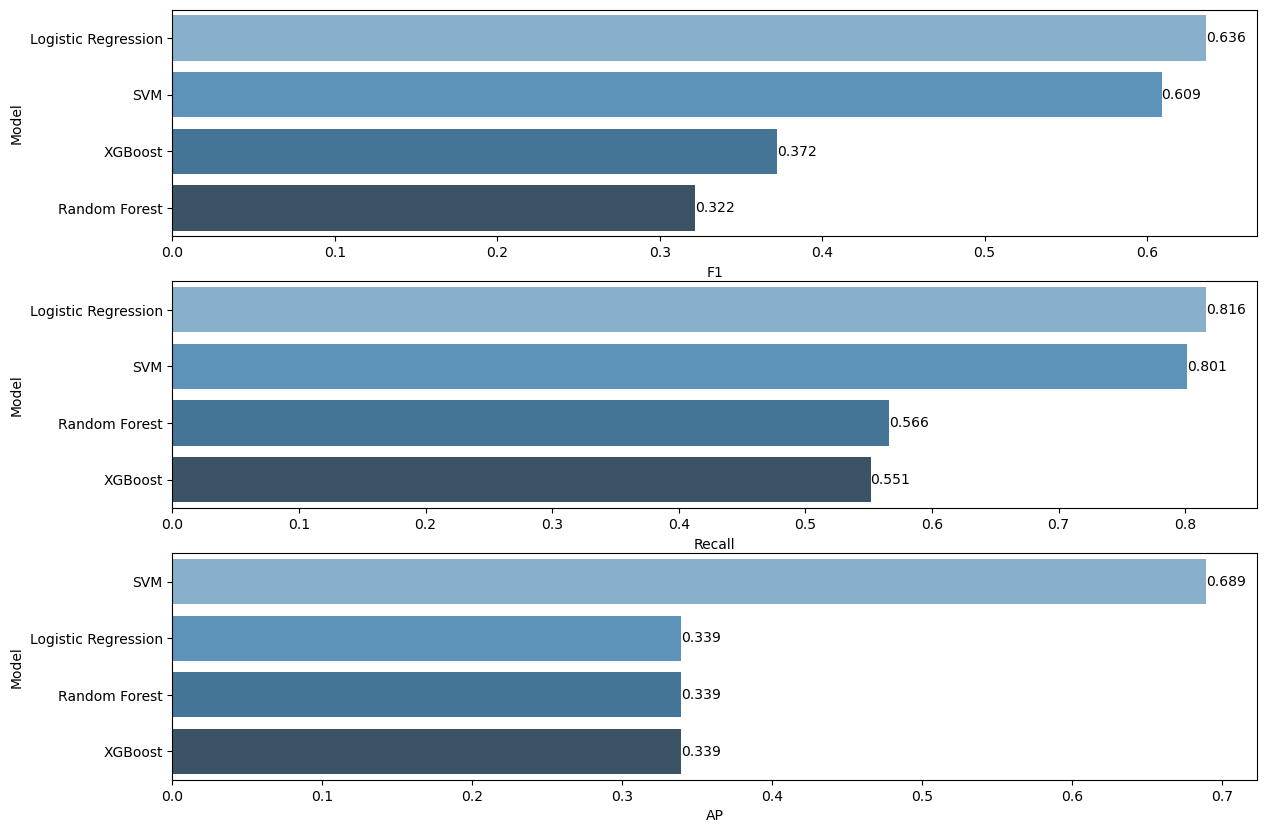

In [132]:
# as it shown previously we applyed multiple models 
# so we need to know what the best one to the data

compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [145]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\reemb\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:

X_train_ohe = column_trans.fit_transform(X_train)

In [ ]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)


In [ ]:
X_train_over.shape

In [ ]:
y_train_over.value_counts()


In [ ]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
X_train_under.shape

In [ ]:
y_train_under.value_counts()


In [ ]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [ ]:
y_train.value_counts()

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_over.value_counts()


In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_under.value_counts()


In [ ]:
steps = [("o", over), ("u", under)]
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_train.value_counts()

## Logistic Regression Over/ Under Sampling

In [ ]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

In [ ]:
operations = [
    ("OneHotEncoder", column_trans),
    ("o", over),
    ("u", under),
    ("log", LogisticRegression(max_iter=10000, random_state=101)),
] 

In [ ]:
smote_pipeline = imbpipeline(steps=operations)

In [ ]:
smote_pipeline.fit(X_train, y_train)

In [ ]:
evaluate_classification_model(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [142]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7714885514629068

In [143]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7633856827778824

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [134]:
#So the final model is the Logistic Regression 

column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101),
    ),
]

final_model = Pipeline(steps=operations_final)

In [135]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [137]:
X[X.Gender == "Male"].describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.00000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,255.449090,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.004360,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.426520,1519.422160,289.786868,1060.496794,254.390100,1293.040267,847.637599,623.143114,356.354706,36.095153,64.171070,23.109772,244.823544,804.885099,101.893819,271.573993,349.573480,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.708130,199.760708,344.002052,72.564504,346.256732,379.948448,1063.412670,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.739420,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.560400,388.017440,1058.239805,858.714286,176.168761,848.762247,30.172352
std,37.295117,62.356906,17.281413,14.579399,58.714251,12.89351,10.329358,19.074837,34.511924,17.512428,32.450260,4.097052,13.970798,16.640502,6.141613,76.330564,26.4

In [138]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting      255.44909
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference             252.16594
balloffootlength                   201.229546
biacromialbreadth                   416.00436
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                   392.42652
cervicaleheight                   

In [139]:
#handling the NaN data
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [140]:
pd.DataFrame(male_mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,255.44909,1442.946397,335.819441,229.590921,1331.098487,252.16594,201.229546,416.00436,358.579636,275.632213,510.927674,74.844063,331.655809,315.718389,142.434983,1021.294178,246.362401,889.500385,619.217235,504.001026,392.42652,1519.42216,289.786868,1060.496794,254.3901,1293.040267,847.637599,623.143114,356.354706,36.095153,64.17107,23.109772,244.823544,804.885099,101.893819,271.573993,349.57348,310.528084,580.702231,480.928956,1132.125673,88.379841,212.571172,193.509361,154.183637,574.70813,199.760708,344.002052,72.564504,346.256732,379.948448,1063.41267,639.948705,431.393947,450.628623,489.366504,555.224929,492.625545,73.061554,409.670685,122.684534,398.192101,435.159528,1428.469351,116.610156,430.684791,268.313927,1179.902539,364.305976,149.832265,918.678636,897.179277,594.007951,1816.628879,1758.385483,1440.699667,1122.444473,626.335214,180.73942,813.085407,469.222878,131.116697,902.586817,1666.783278,478.017953,327.110798,943.043344,238.5604,388.01744,1058.239805,858.714286,176.168761,848.762247,Male,California,30.172352,Right hand


In [141]:
final_model.predict(pd.DataFrame(male_mean_human).T)

array(['Hispanic'], dtype=object)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___